In [15]:
#라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#파일불러오기
upStream = pd.read_csv('elec_use.csv',encoding='cp949') #원본
tag = ["year","month","locate","what","people","used","money","avg_money"]
origin = pd.read_csv('elec_use_18to22.csv',names=tag,encoding='cp949') #18~22년 데이터 추출

# 프로토타입 생성

In [17]:
#프로토타입!
class month_data_anal:                 #월별 데이터 집합
    def __init__(self, year, month, used):
        self.year = int(year)
        self.month = int(month)
        self.used = int(used)
    def toString(self):
         print('{}년 {}월 사용량 : {}'.format(self.year,self.month,self.used))
         
class year_sumAnal:              #연도별 합계 구분 
    def __init__(self, data,year):
        self.year = year
        self.people = int(data['people'].sum()/len(data))
        self.used = int(data['used'].sum()/len(data))
        self.money = int(data['money'].sum()/len(data))
        self.avg = int(data['avg_money'].sum()/len(data))
    def toString(self):
        print("년도 : {}\n가구 수 : {}\n사용량 : {}\n요금 합계 평균 : {}\n평균 단가 : {}".format(self.year,self.people,self.used,self.money,self.avg))

def returnClass(data, loc, year):       #지역과 '년도'로 데이터 추출 => 한 년도 내 모든 데이터 종합 평균치
    row = data.loc[data.year == year]
    row = row.loc[row.locate == loc]
    target  = row.loc[row.what == '합계']
    return year_sumAnal(target,year)
    
def month_anal(data,loc,year,month,what):    #지역, '월', 용도 데이터 추출 => 한 년도 내 월
    row = data.loc[data.year == year]
    row = row.loc[row.month == month]
    row = row.loc[row.locate == loc]
    target  = row.loc[row.what == what]
    if len(target['month']) == 0:
        return month_data_anal(-1,-1,-1)   #에러처리 (빈 값 존재 시)
    return month_data_anal(target['year'],target['month'],target['used'])

# 프로토타입 양평지역 전력 사용량 구하기

In [18]:
#데이터 셋 
yp_data = []
yp_monthly_data = []#양평군 주택용
yp_monthly_data2 = []#양평군 산업용
yp_monthly_data3 = []#양평군 일반용
yp_monthly_data4 = []#양평군 농사용

for i in range(2018,2023):
    yp_data.append(returnClass(origin,"양평군", i))                    #연도별 데이터 종합
    
for i in range(1,13):
    yp_monthly_data.append(month_anal(origin,"양평군", 2021,i,"주택용"))     #2021년도 양평군 월별 데이터 종합
    yp_monthly_data2.append(month_anal(origin,"양평군", 2021,i,"산업용"))  
    yp_monthly_data3.append(month_anal(origin,"양평군", 2021,i,"일반용"))
    yp_monthly_data4.append(month_anal(origin,"양평군", 2021,i,"농사용"))
yp_monthly_data.pop(7)  #에러 체크 하드코딩! 
yp_monthly_data2.pop(7)
yp_monthly_data3.pop(7)
yp_monthly_data4.pop(7) #이렇게 하면 ㅠㅠ

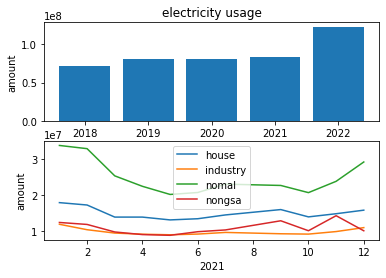

In [19]:
plt.subplot(2, 1, 1)   
x = np.array([i.year for i in yp_data])
y = np.array([i.used for i in yp_data])    #전력 사용량
plt.bar(x, y)
plt.title("electricity usage")
plt.xlabel('year')
plt.ylabel('amount')

plt.subplot(2, 1, 2)
x = np.array([i.month for i in yp_monthly_data])    #월
y = np.array([i.used for i in yp_monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in yp_monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in yp_monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in yp_monthly_data4])    #농사 사용량

plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.ylabel('amount')
plt.legend()
plt.show()

# 공공데이터를 이용한 경기도 전력 사용량 분석

> 먼저 경기도 전체 연도별 전력 사용량을 알아보자


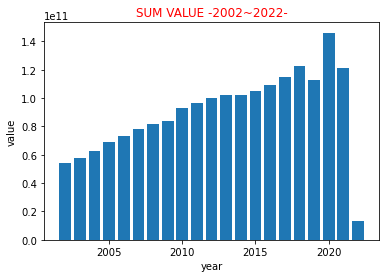

In [20]:
idx = upStream[upStream['계약종류명'] == "합계"].index
result = upStream.drop(idx)

all_sum = []
for i in range(2002,2023):
    a = result[result['사용년도'] == i]
    a = a['전력사용량(kWh)'].sum()
    all_sum.append(a)

x = np.arange(2002,2023)
y = np.array(all_sum)
plt.bar(x,y)
plt.xlabel('year')
plt.ylabel('value')
plt.title("SUM VALUE -2002~2022-", c='red')
plt.show()

### 1. 경기도 지역별 전력 사용량 분석

- [x] 시흥
- [x] 고양
- [x] 하남
- [x] 양평

***프로토타입 클래스와 함수 이용***
```python
class month_data_anal:                 #월별 데이터 집합
         
class year_sumAnal:              #연도별 합계 구분 

def returnClass(data, loc, year):       #지역과 '년도'로 데이터 추출 => 한 년도 내 모든 데이터 종합 평균치
    return year_sumAnal(a,b)#->해당 행 데이터 집합 클래스 리턴
def month_anal(data,loc,year,month,what):    #지역, '월', 용도 데이터 추출 => 한 년도 내 월
    return month_data_anal(a,b,c)#->해당 행 데이터 집합 클래스 리턴
```


시흥 데이터 분석

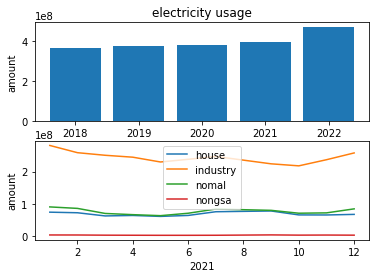

In [21]:
#데이터 셋 
data = []
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용

for i in range(2018,2023):
    data.append(returnClass(origin,"시흥시", i))                    #연도별 데이터 종합
    
for i in range(1,13):
    monthly_data.append(month_anal(origin,"시흥시", 2021,i,"주택용"))     #2021년도 시흥 월별 데이터 종합
    monthly_data2.append(month_anal(origin,"시흥시", 2021,i,"산업용"))  
    monthly_data3.append(month_anal(origin,"시흥시", 2021,i,"일반용"))
    monthly_data4.append(month_anal(origin,"시흥시", 2021,i,"농사용"))
monthly_data.pop(7)  #에러 체크 하드코딩! 
monthly_data2.pop(7)
monthly_data3.pop(7)
monthly_data4.pop(7) #이렇게 하면 ㅠㅠ

plt.subplot(2, 1, 1)   
x = np.array([i.year for i in data])
y = np.array([i.used for i in data])    #전력 사용량
plt.bar(x, y)
plt.title("electricity usage")
plt.xlabel('year')
plt.ylabel('amount')

plt.subplot(2, 1, 2)
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.ylabel('amount')
plt.legend()
plt.show()

고양시 데이터 분석

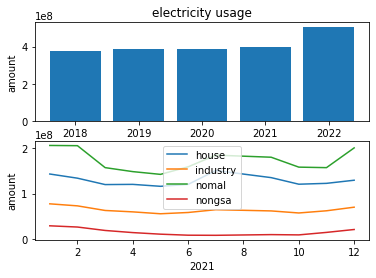

In [22]:
#데이터 셋 
data = []
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용

for i in range(2018,2023):
    data.append(returnClass(origin,"고양시", i))                    #연도별 데이터 종합
    
for i in range(1,13):
    monthly_data.append(month_anal(origin,"고양시", 2021,i,"주택용"))     #2021년도 고양 월별 데이터 종합
    monthly_data2.append(month_anal(origin,"고양시", 2021,i,"산업용"))  
    monthly_data3.append(month_anal(origin,"고양시", 2021,i,"일반용"))
    monthly_data4.append(month_anal(origin,"고양시", 2021,i,"농사용"))
monthly_data.pop(7)  #에러 체크 하드코딩! 
monthly_data2.pop(7)
monthly_data3.pop(7)
monthly_data4.pop(7) #이렇게 하면 ㅠㅠ

plt.subplot(2, 1, 1)   
x = np.array([i.year for i in data])
y = np.array([i.used for i in data])    #전력 사용량
plt.bar(x, y)
plt.title("electricity usage")
plt.xlabel('year')
plt.ylabel('amount')

plt.subplot(2, 1, 2)
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.ylabel('amount')
plt.legend()
plt.show()  


하남 데이터 분석

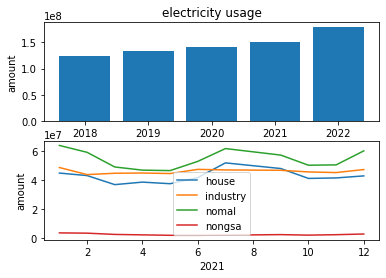

In [23]:
#데이터 셋 
data = []
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용

for i in range(2018,2023):
    data.append(returnClass(origin,"하남시", i))                    #연도별 데이터 종합
    
for i in range(1,13):
    monthly_data.append(month_anal(origin,"하남시", 2021,i,"주택용"))     #2021년도 하남 월별 데이터 종합
    monthly_data2.append(month_anal(origin,"하남시", 2021,i,"산업용"))  
    monthly_data3.append(month_anal(origin,"하남시", 2021,i,"일반용"))
    monthly_data4.append(month_anal(origin,"하남시", 2021,i,"농사용"))
monthly_data.pop(7)  #에러 체크 하드코딩! 
monthly_data2.pop(7)
monthly_data3.pop(7)
monthly_data4.pop(7) #이렇게 하면 ㅠㅠ

plt.subplot(2, 1, 1)   
x = np.array([i.year for i in data])
y = np.array([i.used for i in data])    #전력 사용량
plt.bar(x, y)
plt.title("electricity usage")
plt.xlabel('year')
plt.ylabel('amount')

plt.subplot(2, 1, 2)
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.ylabel('amount')
plt.legend()
plt.show()  

In [24]:
def all_data_anal(data,loc,year,month,what):    #전체 데이터용 월별 구분 함수
    row = data.loc[data.사용년도 == year]
    row = row.loc[row.사용월 == month]
    row = row.loc[row.시군명 == loc]
    target  = row.loc[row.계약종류명 == what]
    return month_data_anal(target['사용년도'],target['사용월'],target['전력사용량(kWh)'])

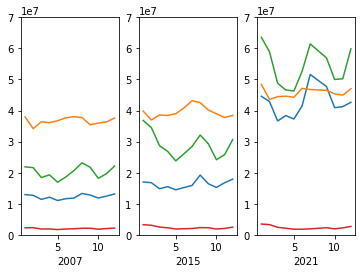

In [25]:
#2007 하남 깡촌 시절 
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용
  
for i in range(1,13):
    monthly_data.append(all_data_anal(result,"하남시", 2007,i,"주택용")) 
    monthly_data2.append(all_data_anal(result,"하남시", 2007,i,"산업용"))  
    monthly_data3.append(all_data_anal(result,"하남시", 2007,i,"일반용"))
    monthly_data4.append(all_data_anal(result,"하남시", 2007,i,"농사용"))

plt.subplot(1, 3, 1)   
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2007')
plt.ylim(0,70000000)


#2015년 하남 깡촌 + 성장기 시절
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용
  
for i in range(1,13):
    monthly_data.append(all_data_anal(result,"하남시", 2015,i,"주택용")) 
    monthly_data2.append(all_data_anal(result,"하남시", 2015,i,"산업용"))  
    monthly_data3.append(all_data_anal(result,"하남시", 2015,i,"일반용"))
    monthly_data4.append(all_data_anal(result,"하남시", 2015,i,"농사용"))

plt.subplot(1, 3, 2)   
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2015')
plt.ylim(0,70000000)

#2021년 한국 최고의 도시 하남
data = []
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용

for i in range(2018,2023):
    data.append(returnClass(origin,"하남시", i))                    #연도별 데이터 종합
    
for i in range(1,13):
    monthly_data.append(month_anal(origin,"하남시", 2021,i,"주택용"))     #2021년도 하남 월별 데이터 종합
    monthly_data2.append(month_anal(origin,"하남시", 2021,i,"산업용"))  
    monthly_data3.append(month_anal(origin,"하남시", 2021,i,"일반용"))
    monthly_data4.append(month_anal(origin,"하남시", 2021,i,"농사용"))
monthly_data.pop(7)  #에러 체크 하드코딩! 
monthly_data2.pop(7)
monthly_data3.pop(7)
monthly_data4.pop(7) 

plt.subplot(1, 3, 3)
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.ylim(0,70000000)
plt.show()  

안산시 추가 데이터 ++++

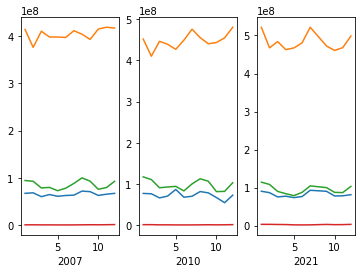

In [26]:
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용
  
for i in range(1,13):
    monthly_data.append(all_data_anal(result,"안산시", 2007,i,"주택용")) 
    monthly_data2.append(all_data_anal(result,"안산시", 2007,i,"산업용"))  
    monthly_data3.append(all_data_anal(result,"안산시", 2007,i,"일반용"))
    monthly_data4.append(all_data_anal(result,"안산시", 2007,i,"농사용"))

plt.subplot(1, 3, 1)   
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2007')


monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용
  
for i in range(1,13):
    monthly_data.append(all_data_anal(result,"안산시", 2010,i,"주택용")) 
    monthly_data2.append(all_data_anal(result,"안산시", 2010,i,"산업용"))  
    monthly_data3.append(all_data_anal(result,"안산시", 2010,i,"일반용"))
    monthly_data4.append(all_data_anal(result,"안산시", 2010,i,"농사용"))

plt.subplot(1, 3, 2)   
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2010')

data = []
monthly_data = []#주택용
monthly_data2 = []#산업용
monthly_data3 = []#일반용
monthly_data4 = []#농사용

for i in range(1,13):
    monthly_data.append(month_anal(origin,"안산시", 2021,i,"주택용"))   
    monthly_data2.append(month_anal(origin,"안산시", 2021,i,"산업용"))  
    monthly_data3.append(month_anal(origin,"안산시", 2021,i,"일반용"))
    monthly_data4.append(month_anal(origin,"안산시", 2021,i,"농사용"))
monthly_data.pop(7)  #에러 체크 하드코딩! 
monthly_data2.pop(7)
monthly_data3.pop(7)
monthly_data4.pop(7) 

plt.subplot(1, 3, 3)
x = np.array([i.month for i in monthly_data])    #월
y = np.array([i.used for i in monthly_data])    #주택 사용량
plt.plot(x, y,label="house")
y = np.array([i.used for i in monthly_data2])    #산업 사용량
plt.plot(x, y,label="industry")
y = np.array([i.used for i in monthly_data3])    #일반 사용량
plt.plot(x, y,label="nomal")
y = np.array([i.used for i in monthly_data4])    #농사 사용량
plt.plot(x, y,label="nongsa")
plt.xlabel('2021')
plt.show()  

## 해당 지역 내 이용자 수 분석

In [27]:
class people_info:              #연도별 합계 구분 
    def __init__(self, data,year):
        self.year = year
        self.people = int(data['people'].sum()/len(data))
    def __str__(self):
        return f'-{self.year}년 {self.people}가구 사용-'
    
def people_calc(data, loc, year):       #지역과 '년도'로 데이터 추출 => 한 년도 내 모든 데이터 종합 평균치
    row = data.loc[data.year == year]
    row = row.loc[row.locate == loc]
    target  = row.loc[row.what == '합계']
    return people_info(target,year)

In [28]:
people = {'양평' : [], '시흥' : [], '고양' : [], '하남' : []}
for i in range(2018,2023):
    people['양평'].append(people_calc(origin,"양평군", i))
    people['시흥'].append(people_calc(origin,"시흥시", i))
    people['고양'].append(people_calc(origin,"고양시", i))
    people['하남'].append(people_calc(origin,"하남시", i))
    
print("양평군 이용자 수")
for i in range(5):
    print(str(people['양평'][i]))
print("시흥시 이용자 수")
for i in range(5):
    print(str(people['시흥'][i]))
print("고양시 이용자 수")
for i in range(5):
    print(str(people['고양'][i]))
print("하남시 이용자 수")
for i in range(5):
    print(str(people['하남'][i]))    

양평군 이용자 수
-2018년 114997가구 사용-
-2019년 118593가구 사용-
-2020년 122026가구 사용-
-2021년 125687가구 사용-
-2022년 127247가구 사용-
시흥시 이용자 수
-2018년 157478가구 사용-
-2019년 161171가구 사용-
-2020년 164603가구 사용-
-2021년 168555가구 사용-
-2022년 170277가구 사용-
고양시 이용자 수
-2018년 236410가구 사용-
-2019년 238951가구 사용-
-2020년 242334가구 사용-
-2021년 245277가구 사용-
-2022년 247624가구 사용-
하남시 이용자 수
-2018년 53877가구 사용-
-2019년 55409가구 사용-
-2020년 56923가구 사용-
-2021년 57659가구 사용-
-2022년 58412가구 사용-
